In [1]:
#import libery
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data set
fm = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fm.load_data()

In [3]:
#train data size
x_train.shape

(60000, 28, 28)

In [4]:
#test data size
x_test.shape

(10000, 28, 28)

In [5]:
#show train data one position
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [6]:
#train data y axis position 0
y_train[1]

0

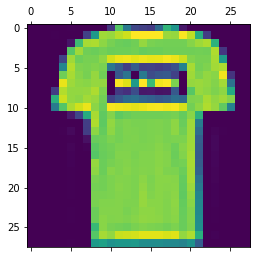

In [7]:
#show image train data
plt.matshow(x_train[1])

# Normalize training data before training the neural net

In [8]:
x_train = x_train/255


In [9]:
x_test = x_test/255

# Now build the Sequential Model and add layers into it

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [13]:
model.fit(x_train, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6326 - accuracy: 0.7812
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3962 - accuracy: 0.8596
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3436 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3175 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3020 - accuracy: 0.8896


In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.8706


[0.36764422059059143, 0.8705999851226807]

Above shows accuracy score of 82.76%. The first parameter is loss

Text(69.0, 0.5, 'Truth')

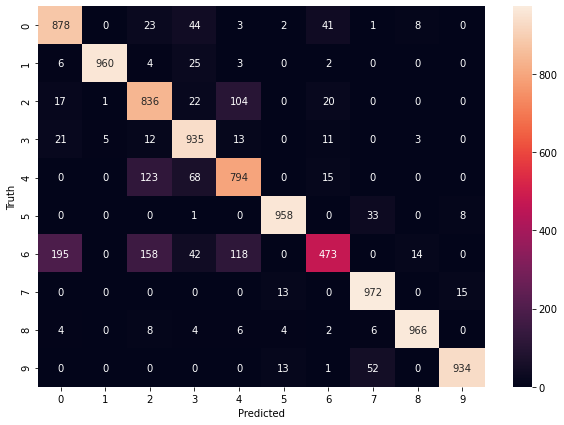

In [15]:
import tensorflow as tf
import seaborn as sn
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

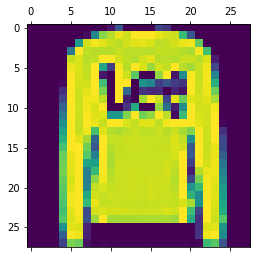

In [16]:
plt.matshow(x_test[1])

In [17]:
yp = model.predict(x_test)

In [18]:
np.argmax(yp[1])

2

In [19]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [20]:
class_labels[np.argmax(yp[1])]

'Pullover'